Data Description:

The data comes from direct marketing efforts of a European banking institution. The marketing campaign involves making a phone call to a customer, often multiple times to ensure a product subscription, in this case a term deposit. Term deposits are usually short-term deposits with maturities ranging from one month to a few years. The customer must understand when buying a term deposit that they can withdraw their funds only after the term ends. All customer information that might reveal personal information is removed due to privacy concerns.

Attributes:

age : age of customer (numeric)

job : type of job (categorical)

marital : marital status (categorical)

education (categorical)

default: has credit in default? (binary)

balance: average yearly balance, in euros (numeric)

housing: has a housing loan? (binary)

loan: has personal loan? (binary)

contact: contact communication type (categorical)

day: last contact day of the month (numeric)

month: last contact month of year (categorical)

duration: last contact duration, in seconds (numeric)

campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

Output (desired target):

y - has the client subscribed to a term deposit? (binary)

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

In [32]:
#Load Data
data = pd.read_csv('term-deposit-marketing-2020.csv')

In [33]:
data.sample(n=10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
9743,48,management,married,primary,no,1744,no,no,unknown,9,jun,181,1,no
31941,37,management,divorced,tertiary,no,443,yes,no,cellular,9,apr,240,3,no
35215,32,technician,single,tertiary,no,69,no,no,cellular,7,may,95,1,no
27102,44,management,divorced,unknown,no,1784,no,yes,cellular,21,nov,279,1,no
39748,38,technician,single,secondary,no,311,yes,no,cellular,28,may,61,2,no
18854,46,management,married,secondary,no,231,no,yes,cellular,4,aug,243,1,no
29166,35,services,married,secondary,no,-50,no,no,cellular,2,feb,71,1,no
33591,37,blue-collar,married,secondary,no,504,yes,no,cellular,20,apr,87,2,no
2151,59,retired,married,secondary,no,434,yes,no,unknown,12,may,63,3,no
14399,52,technician,divorced,secondary,no,280,no,no,cellular,14,jul,393,5,no


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-null  object
 2   marital    40000 non-null  object
 3   education  40000 non-null  object
 4   default    40000 non-null  object
 5   balance    40000 non-null  int64 
 6   housing    40000 non-null  object
 7   loan       40000 non-null  object
 8   contact    40000 non-null  object
 9   day        40000 non-null  int64 
 10  month      40000 non-null  object
 11  duration   40000 non-null  int64 
 12  campaign   40000 non-null  int64 
 13  y          40000 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.3+ MB


In [35]:
#check to see if there is any duplcates
print("number of duplicate rows: ", data[data.duplicated()].shape)

number of duplicate rows:  (0, 14)


In [36]:
# Keep these duplicates for now
# Let's look at numerical data variables first
data_num = data[["age","balance","day","duration","campaign"]]
data_num.head()

,age,balance,day,duration,campaign
0,58,2143,5,261,1
1,44,29,5,151,1
2,33,2,5,76,1
3,47,1506,5,92,1
4,33,1,5,198,1


In [37]:
data_num.describe()

,age,balance,day,duration,campaign
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,40.544600,1274.277550,16.017225,254.824300,2.882175
std,9.641776,2903.769716,8.278127,259.366498,3.239051
min,19.000000,-8019.000000,1.000000,0.000000,1.000000
25%,33.000000,54.000000,8.000000,100.000000,1.000000
50%,39.000000,407.000000,17.000000,175.000000,2.000000
75%,48.000000,1319.000000,21.000000,313.000000,3.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000


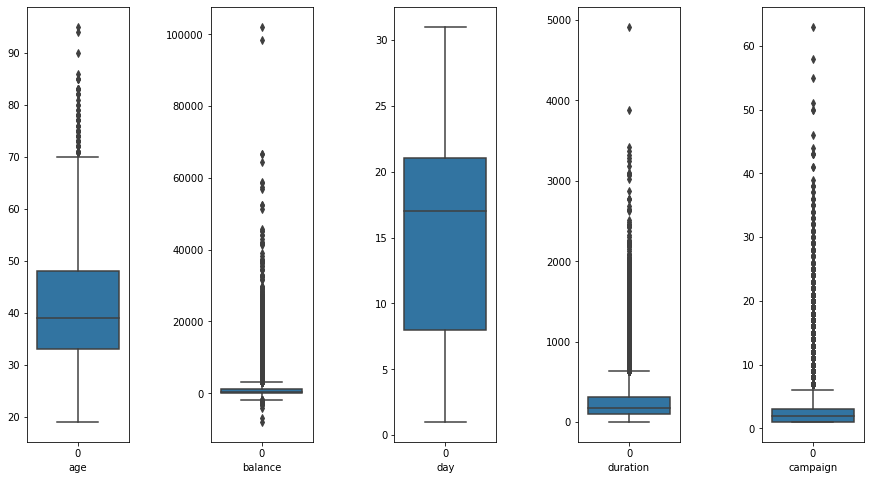

In [38]:
fig, axs = plt.subplots(ncols = 5, figsize= (15, 8))
plt.subplots_adjust(hspace = 5)
for i in range(len(data_num.columns)):
  sns.boxplot(data = data_num.iloc[:,i], ax = axs[i])
  axs[i].set(xlabel=data_num.columns[i])
plt.subplots_adjust(wspace = 0.8)

In [39]:
# Now let's look at categorical data
data_cate = data.drop(columns=["age","balance","day","duration","campaign"])
data_cate.head()

,job,marital,education,default,housing,loan,contact,month,y
0,management,married,tertiary,no,yes,no,unknown,may,no
1,technician,single,secondary,no,yes,no,unknown,may,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,no
4,unknown,single,unknown,no,no,no,unknown,may,no


In [40]:
# number of unique values
data_cate.nunique(axis=0)

job          12
marital       3
education     4
default       2
housing       2
loan          2
contact       3
month        11
y             2
dtype: int64

In [41]:
data_cate['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [42]:
data_cate['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [43]:
data_cate['education'].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [44]:
data_cate['contact'].unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [45]:
# It's interesting that there is no data for the month of September
data_cate['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr'], dtype=object)

In [46]:
# Replace unknown values with NaN
df = data.replace('unknown', np.nan)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        39765 non-null  object
 2   marital    40000 non-null  object
 3   education  38469 non-null  object
 4   default    40000 non-null  object
 5   balance    40000 non-null  int64 
 6   housing    40000 non-null  object
 7   loan       40000 non-null  object
 8   contact    27235 non-null  object
 9   day        40000 non-null  int64 
 10  month      40000 non-null  object
 11  duration   40000 non-null  int64 
 12  campaign   40000 non-null  int64 
 13  y          40000 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.3+ MB


In [47]:
#Let's take a closer look at y column - what we need to predict
df['y'].value_counts()

no     37104
yes     2896
Name: y, dtype: int64

In [48]:
# There are many more data for "no" than "yes". This data is imbalance. Leave it for now

# create a new column called age group
conditions = [
    (df['age'] <= 20),
    (df['age'] > 20) & (df['age'] <= 30),
    (df['age'] > 30) & (df['age'] <= 40),
    (df['age'] > 40) & (df['age'] <= 50),
    (df['age'] > 50) & (df['age'] <= 60),
    (df['age'] > 60)
    ]
values = ['under 20', '20-30', '30-40', '40-50', '50-60', 'above 60']

df['age_group'] = np.select(conditions, values)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y,age_group
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,no,50-60
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,no,40-50
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,no,30-40
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,no,40-50
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,no,30-40


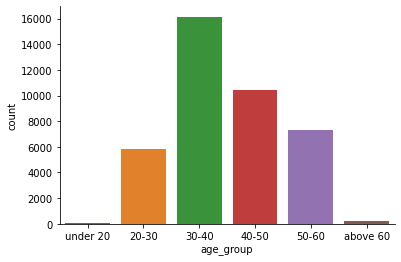

In [49]:
# Take a look at number of data based on age group
df['age_group'] = pd.Categorical(df['age_group'],
                                 ["under 20", "20-30", "30-40", "40-50", "50-60", "above 60"])
sns.countplot(x="age_group", data=df)
sns.despine(bottom = False, left = False)

In [50]:
#calculating percentage of yes and no within each age group
total = df.groupby('age_group')['y'].count().reset_index()
yes = df[df.y=='yes'].groupby('age_group')['y'].count().reset_index()
yes['percentage'] = [i / j * 100 for i,j in zip(yes['y'], total['y'])]
total['percentage'] = [i / j * 100 for i,j in zip(total['y'], total['y'])]
total['age_group'] = pd.Categorical(total['age_group'],
                                 ["under 20", "20-30", "30-40", "40-50", "50-60", "above 60"])
yes['age_group'] = pd.Categorical(yes['age_group'],
                                 ["under 20", "20-30", "30-40", "40-50", "50-60", "above 60"])
yes

,age_group,y,percentage
0,under 20,6,17.647059
1,20-30,593,10.215332
2,30-40,1129,6.992444
3,40-50,634,6.059448
4,50-60,443,6.053567
5,above 60,91,38.888889


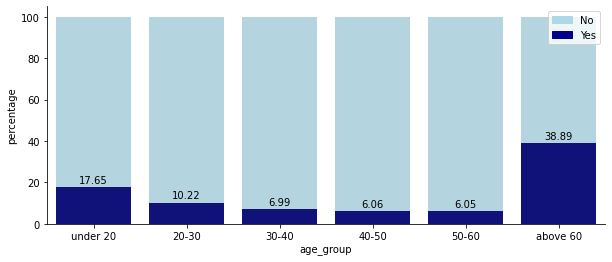

In [51]:
# Look at the result visually
fig, axs = plt.subplots(figsize= (10, 4))
# bar chart 1 -> top bars (group of 'y='no')
bar1 = sns.barplot(x="age_group",  y="percentage", data=total, color='lightblue')

# bar chart 2 -> bottom bars (group of 'y=yes')
bar2 = sns.barplot(x="age_group", y="percentage", data=yes, color='darkblue')
# add legend
top_bar = mpatches.Patch(color='lightblue', label='No')
bottom_bar = mpatches.Patch(color='darkblue', label='Yes')
plt.legend(handles=[top_bar, bottom_bar])

#display values
for index, row in yes.iterrows():
    bar2.text(row.name,row.percentage + 2, round(row.percentage,2), color='black', ha="center")

# show the graph
sns.despine(bottom = False, left = False)
plt.show()

In [52]:
%%capture
# It seems that the best age group to  target is above 60. They say yes almost 40% of the time
# clean up - drop age_group to return to original dataset
df = df.drop(columns='age_group')

In [53]:
# Is there a time of the year where potential lead is more likely to converted?

#sort month
df['month'] = pd.Categorical(df['month'],
                                 ['jan', 'feb', 'mar', 'apr', 'may', 'jun',
                                  'jul', 'aug', 'sep', 'oct', 'nov', 'dec',])
# Because the month of September is missing
# write a function to deal with divison by zero error
def foo(x,y):
    try:
        return x/y
    except ZeroDivisionError:
        return 0
# Calculate percentage of yes by month
total_bymonth = df.groupby('month')['y'].count().reset_index()
yes_bymonth = df[df.y=='yes'].groupby('month')['y'].count().reset_index()
yes_bymonth['percentage'] = [foo(i,j) * 100 for i,j in zip(yes_bymonth['y'], total_bymonth['y'])]

yes_bymonth

,month,y,percentage
0,jan,38,3.231293
1,feb,255,11.106272
2,mar,125,48.449612
3,apr,451,16.593083
4,may,791,5.845403
5,jun,294,6.210393
6,jul,384,6.018809
7,aug,288,5.522531
8,sep,0,0.000000
9,oct,49,61.250000


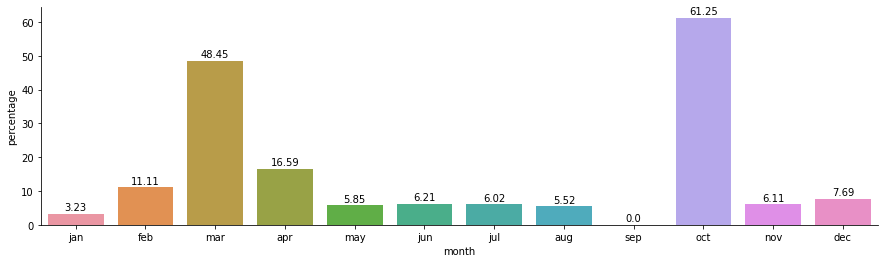

In [54]:
# Visualize by month distribution
fig, axs = plt.subplots(figsize= (15, 4))
axs = sns.barplot(x = 'month',y = 'percentage', data = yes_bymonth)

#display values
for index, row in yes_bymonth.iterrows():
    axs.text(row.name,row.percentage + 1, round(row.percentage,2), color='black', ha="center")

sns.despine(bottom = False, left = False)

     y  yes_default  no_default
0   no          760       36344
1  yes           49        2847


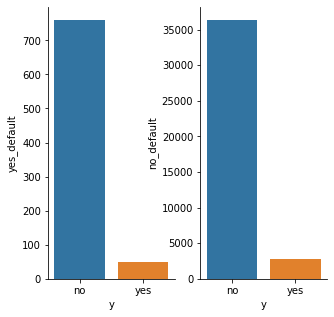

In [55]:
# March and October have the highest rate of converting out of the whole year
# Look to see if having credit in default affect conversion

yes_default = df[df.default=='yes'].groupby('y')['default'].count().reset_index()
no_default = df[df.default=='no'].groupby('y')['default'].count().reset_index()
df_default = yes_default
df_default = df_default.rename(columns={"default": "yes_default"})
df_default['no_default'] = no_default['default']
print(df_default)
 
# Grouped bar chart between 'default' and 'y'
fig, axs = plt.subplots(ncols = 2, figsize= (5, 5))
sns.barplot(x="y", y="yes_default",data = df_default, ax = axs[0])
sns.barplot(x="y", y="no_default",data = df_default, ax = axs[1])
sns.despine(bottom = False, left = False)

     y  yes_housing  no_housing
0   no        22567       14537
1  yes         1464        1432


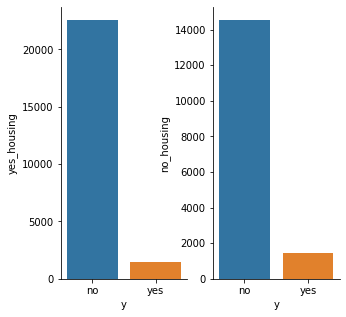

In [56]:
# No significant differences based only on whether a lead have credit in default or not
# Let's look at housing loan instead
yes_house = df[df.housing=='yes'].groupby('y')['housing'].count().reset_index()
no_house = df[df.housing=='no'].groupby('y')['housing'].count().reset_index()
df_house = yes_house
df_house = df_house.rename(columns={"housing": "yes_housing"})
df_house['no_housing'] = no_house['housing']
print(df_house)
 
# Grouped bar chart between 'housing' and 'y'
fig, axs = plt.subplots(ncols = 2, figsize= (5, 5))
sns.barplot(x="y", y="yes_housing",data = df_house, ax = axs[0])
sns.barplot(x="y", y="no_housing",data = df_house, ax = axs[1])
sns.despine(bottom = False, left = False)

     y  yes_loan  no_loan
0   no      6550    30554
1  yes       380     2516


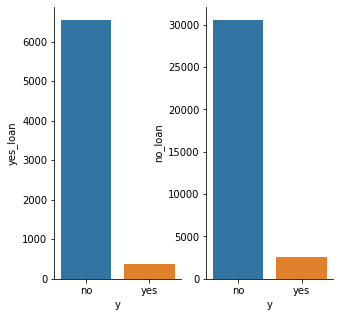

In [57]:
# Leads with no housing loan has slightly better odd to say yes but it's not significant
# What about personal loans

yes_loan = df[df.loan=='yes'].groupby('y')['loan'].count().reset_index()
no_loan = df[df.loan=='no'].groupby('y')['loan'].count().reset_index()
df_loan = yes_loan
df_loan = df_loan.rename(columns={"loan": "yes_loan"})
df_loan['no_loan'] = no_loan['loan']
print(df_loan)
 
# Grouped bar chart between 'loan' and 'y'
fig, axs = plt.subplots(ncols = 2, figsize= (5, 5))
sns.barplot(x="y", y="yes_loan",data = df_loan, ax = axs[0])
sns.barplot(x="y", y="no_loan",data = df_loan, ax = axs[1])
sns.despine(bottom = False, left = False)

     y   cell  phone  unknown
0   no  22681   2155    12268
1  yes   2233    166      497


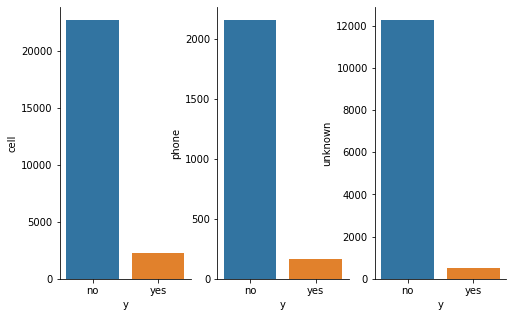

In [58]:
# People without personal loan say yes slightly more often
# Since we have a mot of missing contact data, let's see if it's possible to drop this column
cell_contact = df[df.contact=='cellular'].groupby('y')['contact'].count().reset_index()
phone_contact = df[df.contact=='telephone'].groupby('y')['contact'].count().reset_index()
unknown_contact = data[data.contact=='unknown'].groupby('y')['contact'].count().reset_index()
df_contact = cell_contact
df_contact = df_contact.rename(columns={"contact": "cell"})
df_contact['phone'] = phone_contact['contact']
df_contact['unknown'] = unknown_contact['contact']
print(df_contact)

# Grouped bar chart between 'contact' and 'y'
fig, axs = plt.subplots(ncols = 3, figsize= (8, 5))
sns.barplot(x="y", y="cell",data = df_contact, ax = axs[0])
sns.barplot(x="y", y="phone",data = df_contact, ax = axs[1])
sns.barplot(x="y", y="unknown",data = df_contact, ax = axs[2])
sns.despine(bottom = False, left = False)

In [59]:
#not too much of a differences here either even though people who use cellphone could potentially say yes more
#save dataframe into a filez
df.to_csv('term-deposit-marketing-2020-cleaned.csv', index=False)